In [1]:
import pandas as pd
import torch
from scipy.io import loadmat 
from pathlib import Path
from fastai.vision.all import *
import os

os.chdir(r"C:\Users\xnsjskz\Downloads\miniproject")

C:\Users\xnsjskz\AppData\Local\Temp\ipykernel_49124\1008710467.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
MAT = loadmat('cars_annos.mat')

print("Annotations")
print(MAT["annotations"][0,:5])
print("Class Names")
print(MAT["class_names"][0][:5])

Annotations
[(array(['car_ims/000001.jpg'], dtype='<U18'), array([[112]], dtype=uint8), array([[7]], dtype=uint8), array([[853]], dtype=uint16), array([[717]], dtype=uint16), array([[1]], dtype=uint8), array([[0]], dtype=uint8))
 (array(['car_ims/000002.jpg'], dtype='<U18'), array([[48]], dtype=uint8), array([[24]], dtype=uint8), array([[441]], dtype=uint16), array([[202]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8))
 (array(['car_ims/000003.jpg'], dtype='<U18'), array([[7]], dtype=uint8), array([[4]], dtype=uint8), array([[277]], dtype=uint16), array([[180]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8))
 (array(['car_ims/000004.jpg'], dtype='<U18'), array([[33]], dtype=uint8), array([[50]], dtype=uint8), array([[197]], dtype=uint8), array([[150]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8))
 (array(['car_ims/000005.jpg'], dtype='<U18'), array([[5]], dtype=uint8), array([[8]], dtype=uint8), array([[83]], dtype=uint8

In [3]:
def get_labels():
    MAT = loadmat('cars_annos.mat')
    annotations = MAT["annotations"][0,:]
    nclasses = len(MAT["class_names"][0])
    class_zip = zip(
        range(1, nclasses),
        [c[0] for c in MAT["class_names"][0]]
    )
    class_names = dict(class_zip)
    
    labelled_images = {}
    dataset = []
    for arr in annotations:
        dataset.append(
            [arr[0][0].replace('car_ims/','')] + 
            [y[0][0] for y in arr][1:]
        )
    DF = pd.DataFrame(
        dataset, 
        columns = 
            ['filename',
            "BBOX_Y2",
            "BBOX_X1",
            "BBOX_Y1",
            "BBOX_X2",
            "ClassID",
            "TestSet"]
    )

    DF = DF.assign(ClassName = DF.ClassID.map(dict(class_names)))
    return DF

DF = get_labels()
DF.tail()

,filename,BBOX_Y2,BBOX_X1,BBOX_Y1,BBOX_X2,ClassID,TestSet,ClassName
16180,016181.jpg,38,36,375,234,196,1,NaN
16181,016182.jpg,29,34,235,164,196,1,NaN
16182,016183.jpg,25,32,587,359,196,1,NaN
16183,016184.jpg,56,60,208,186,196,1,NaN
16184,016185.jpg,1,1,200,131,196,1,NaN


In [4]:
DF.ClassName.unique()

array(['AM General Hummer SUV 2000', 'Acura RL Sedan 2012',
       'Acura TL Sedan 2012', 'Acura TL Type-S 2008',
       'Acura TSX Sedan 2012', 'Acura Integra Type R 2001',
       'Acura ZDX Hatchback 2012',
       'Aston Martin V8 Vantage Convertible 2012',
       'Aston Martin V8 Vantage Coupe 2012',
       'Aston Martin Virage Convertible 2012',
       'Aston Martin Virage Coupe 2012', 'Audi RS 4 Convertible 2008',
       'Audi A5 Coupe 2012', 'Audi TTS Coupe 2012', 'Audi R8 Coupe 2012',
       'Audi V8 Sedan 1994', 'Audi 100 Sedan 1994', 'Audi 100 Wagon 1994',
       'Audi TT Hatchback 2011', 'Audi S6 Sedan 2011',
       'Audi S5 Convertible 2012', 'Audi S5 Coupe 2012',
       'Audi S4 Sedan 2012', 'Audi S4 Sedan 2007',
       'Audi TT RS Coupe 2012', 'BMW ActiveHybrid 5 Sedan 2012',
       'BMW 1 Series Convertible 2012', 'BMW 1 Series Coupe 2012',
       'BMW 3 Series Sedan 2012', 'BMW 3 Series Wagon 2012',
       'BMW 6 Series Convertible 2007', 'BMW X5 SUV 2007',
       'BMW X

In [5]:
path = Path('car_connection')

In [6]:
def get_label_from_filename(filename):
    return os.path.splitext(filename)[0].split('_')[0]

In [7]:
dls = ImageDataLoaders.from_name_func(
    path, 
    get_image_files(path), 
    valid_pct = 0.2, 
    seed = 42,
    label_func = get_label_from_filename, 
    item_tfms = Resize(224)
)

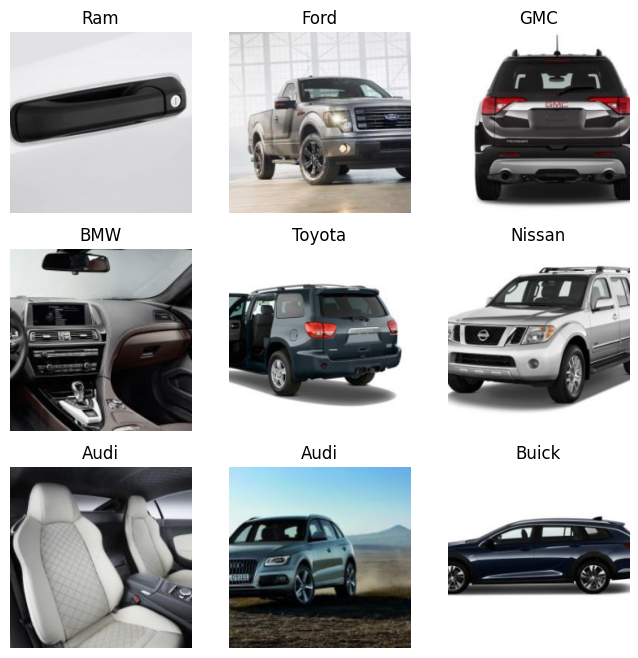

In [8]:
dls.show_batch(max_n=9, figsize=(8, 8))

In [9]:
early_stopping_cb = EarlyStoppingCallback(
    monitor = 'valid_loss', 
    patience = 4
)

In [10]:
learn = vision_learner(dls, resnet34, metrics = error_rate)

In [ ]:
learn.fine_tune(15, cbs = [early_stopping_cb])

epoch,train_loss,valid_loss,error_rate,time


In [ ]:
learn.show_results(max_n = 12, figsize = (8, 8))

In [ ]:
learn.export('classifier.pkl')